## Libraries

In [129]:
import numpy as np
import math

import csv

import matplotlib.pyplot as plt

## Helper Functions

In [139]:
# Returns moving/rolling average
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

# Detects outliers based on std and moving average, and saves them on a .csv file
def detect_outliers(t, n=3, filename='outliers.csv'):
    if n == 1:
        print('Time series length is 1 (no possible outliers). No output file created.')
        return None
    
    mov_avg_t = moving_average(t, n=n)      # Moving/rolling average
    std_dev = np.std(t[0:len(mov_avg_t-1)]) # Std

    outliers = {}
    for idx, v in enumerate(t[1:]):
        if v - (2*std_dev) > mov_avg_t[math.floor(idx % n)]: # More than 2 stds from the corresponding set/window's rolling mean
            outliers[idx] = v

    with open(filename, mode='w') as outlier_file:
        outlier_writer = csv.writer(outlier_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        outlier_writer.writerow(['idx', 'value'])
        for k,v in outliers.items():
            outlier_writer.writerow([k, v])
                  
    return outliers

# Computes and plots input time series, rolling average and outliers (saving outliers in a .csv file)
def getOutliers(t, n):
    fig = plt.figure(figsize=(20,6))

    outliers = detect_outliers(t, n=n)
    mov_avg = moving_average(t, n=n)
    
    plt.plot(range(0, len(t)), t, color='black', lw=0.9)
    plt.scatter([k+1 for k in outliers.keys()], outliers.values(), marker='x', color='red', lw=2)
    plt.plot(range(0+n-1, len(mov_avg)+n-1), mov_avg, '--', lw=0.7, color='blue')

    plt.gca().legend(('Data','Rolling Average', 'Outliers'))
    plt.title('n=' + str(n), size=20, y=1.04)
    plt.gca().spines['top'].set_position(('data',0))
    plt.gca().spines['right'].set_position(('data',0))
    plt.gca().spines['bottom'].set_position(('data',0))
    plt.gca().spines['left'].set_position(('data',0))
    
    plt.tight_layout()
    plt.show()

---
## Time Series Example

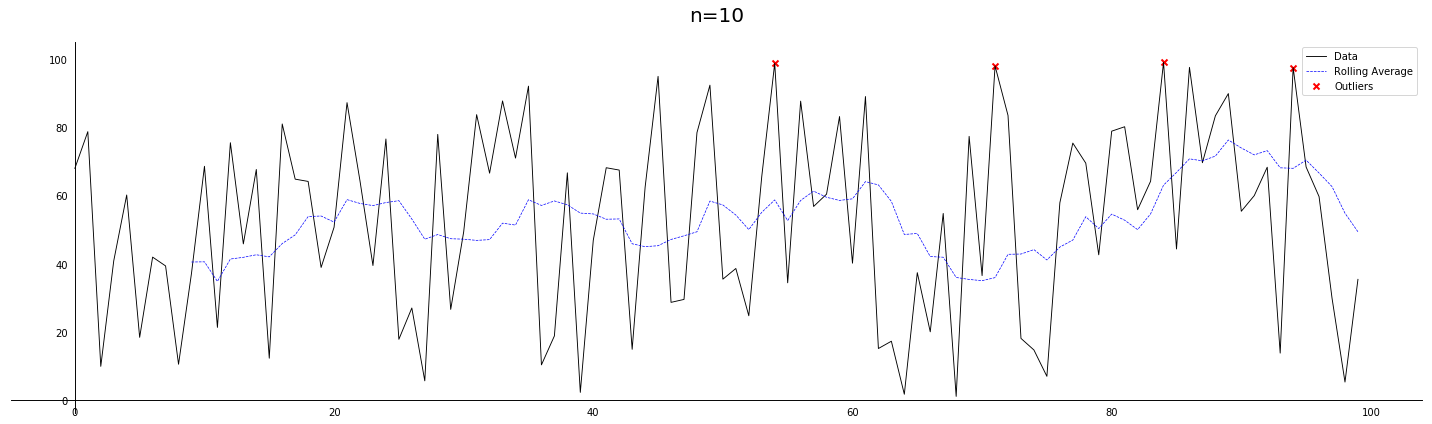

In [149]:
# Example: Random time series (values from 0.5 to 100) 
t = np.random.uniform(low=0.5, high=100, size=(100,)) # Could be a file
plotOutliers(t, 10)